In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FixedLocator)
import pandas as pd

In [2]:
defl = pd.read_parquet('/fs1/project/sievert_nt/jo/raa-v2_paper_tools/aco_def_data/2024.07.25_scaled/K1.00/deflections_CELTrue_K1.00.parquet')
defl_125 = pd.read_parquet('/fs1/project/sievert_nt/jo/raa-v2_paper_tools/aco_def_data/2024.07.25_scaled/K1.25/deflections_CELTrue_K1.25.parquet')
defl_075 = pd.read_parquet('/fs1/project/sievert_nt/jo/raa-v2_paper_tools/aco_def_data/2024.07.25_scaled/K0.75/deflections_CELTrue_K0.75.parquet')

aco = pd.read_parquet('/fs1/project/sievert_nt/jo/raa-v2_paper_tools/aco_def_data/2024.07.25_scaled/K1.00/acoplanarities_CELTrue_K1.00.parquet')
aco_125 = pd.read_parquet('/fs1/project/sievert_nt/jo/raa-v2_paper_tools/aco_def_data/2024.07.25_scaled/K1.25/acoplanarities_CELTrue_K1.25.parquet')
aco_075 = pd.read_parquet('/fs1/project/sievert_nt/jo/raa-v2_paper_tools/aco_def_data/2024.07.25_scaled/K0.75/acoplanarities_CELTrue_K0.75.parquet')


In [6]:
aco['aco'].max()

2.1823747367187787

In [4]:
defl['defl'].mean()

0.024188478698119947

In [5]:
defl_075['defl'].mean()

0.018043019369346304

In [6]:
defl_125['defl'].mean()

0.011639777285035898

In [8]:
for df in [defl_075, defl, defl_125]:
    print('Mean defl: {}'.format(df['defl'].mean()))
    print('Length: {}'.format(len(df['defl'])))

Mean defl: 0.018043019369346304
Length: 20620534
Mean defl: 0.024188478698119947
Length: 21218186
Mean defl: 0.011639777285035898
Length: 84249176


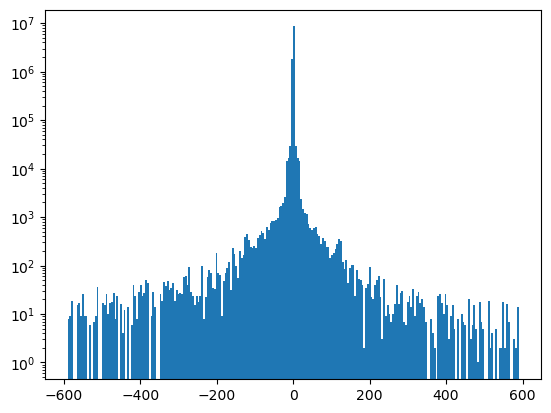

In [19]:
plt.hist((aco['AA_weight_1'] - aco['AA_weight_2']), bins=250)
plt.yscale('log')
#plt.xlim(-0.01, 0.01)

In [16]:
np.amin(np.abs(aco['AA_weight_1'] - aco['AA_weight_2']))

0.0

In [6]:
defl

,defl,weight,AA_weight,pt_0,pt_f,hadron_pt_0,hadron_pt_f,cent
0,0.007146,0.342157,0.365039,13.075056,9.469608,1.591151,0.537145,50-60
0,0.006275,0.342157,0.365039,13.075056,12.215398,1.836614,1.652114,50-60
0,0.010728,0.342157,0.365039,13.075056,7.785951,3.559828,1.483354,50-60
0,0.000099,0.342157,0.365039,13.075056,12.274842,1.048508,8.011612,50-60
0,0.013021,0.342157,0.365039,13.075056,8.390723,1.0888,1.620311,50-60
...,...,...,...,...,...,...,...,...
0,0.014718,208.234195,195.742946,2.632461,2.648761,0.674856,0.164197,80-90
0,0.027156,208.234195,195.742946,2.632461,2.627891,1.459382,0.39362,80-90
0,0.033402,208.234195,195.742946,2.632461,2.646068,0.087553,0.652767,80-90
0,0.037476,208.234195,195.742946,2.632461,2.636425,1.327379,0.478437,80-90


In [3]:
defl = defl.iloc[0:len(aco)]

/tmp/jbahder-tmpdir-aRGISc/ipykernel_3665323/3827515808.py:161: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('aco_plot.png', bbox_inches='tight')
/fs1/home/jbahder/.conda/envs/ape/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/fs1/home/jbahder/.conda/envs/ape/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


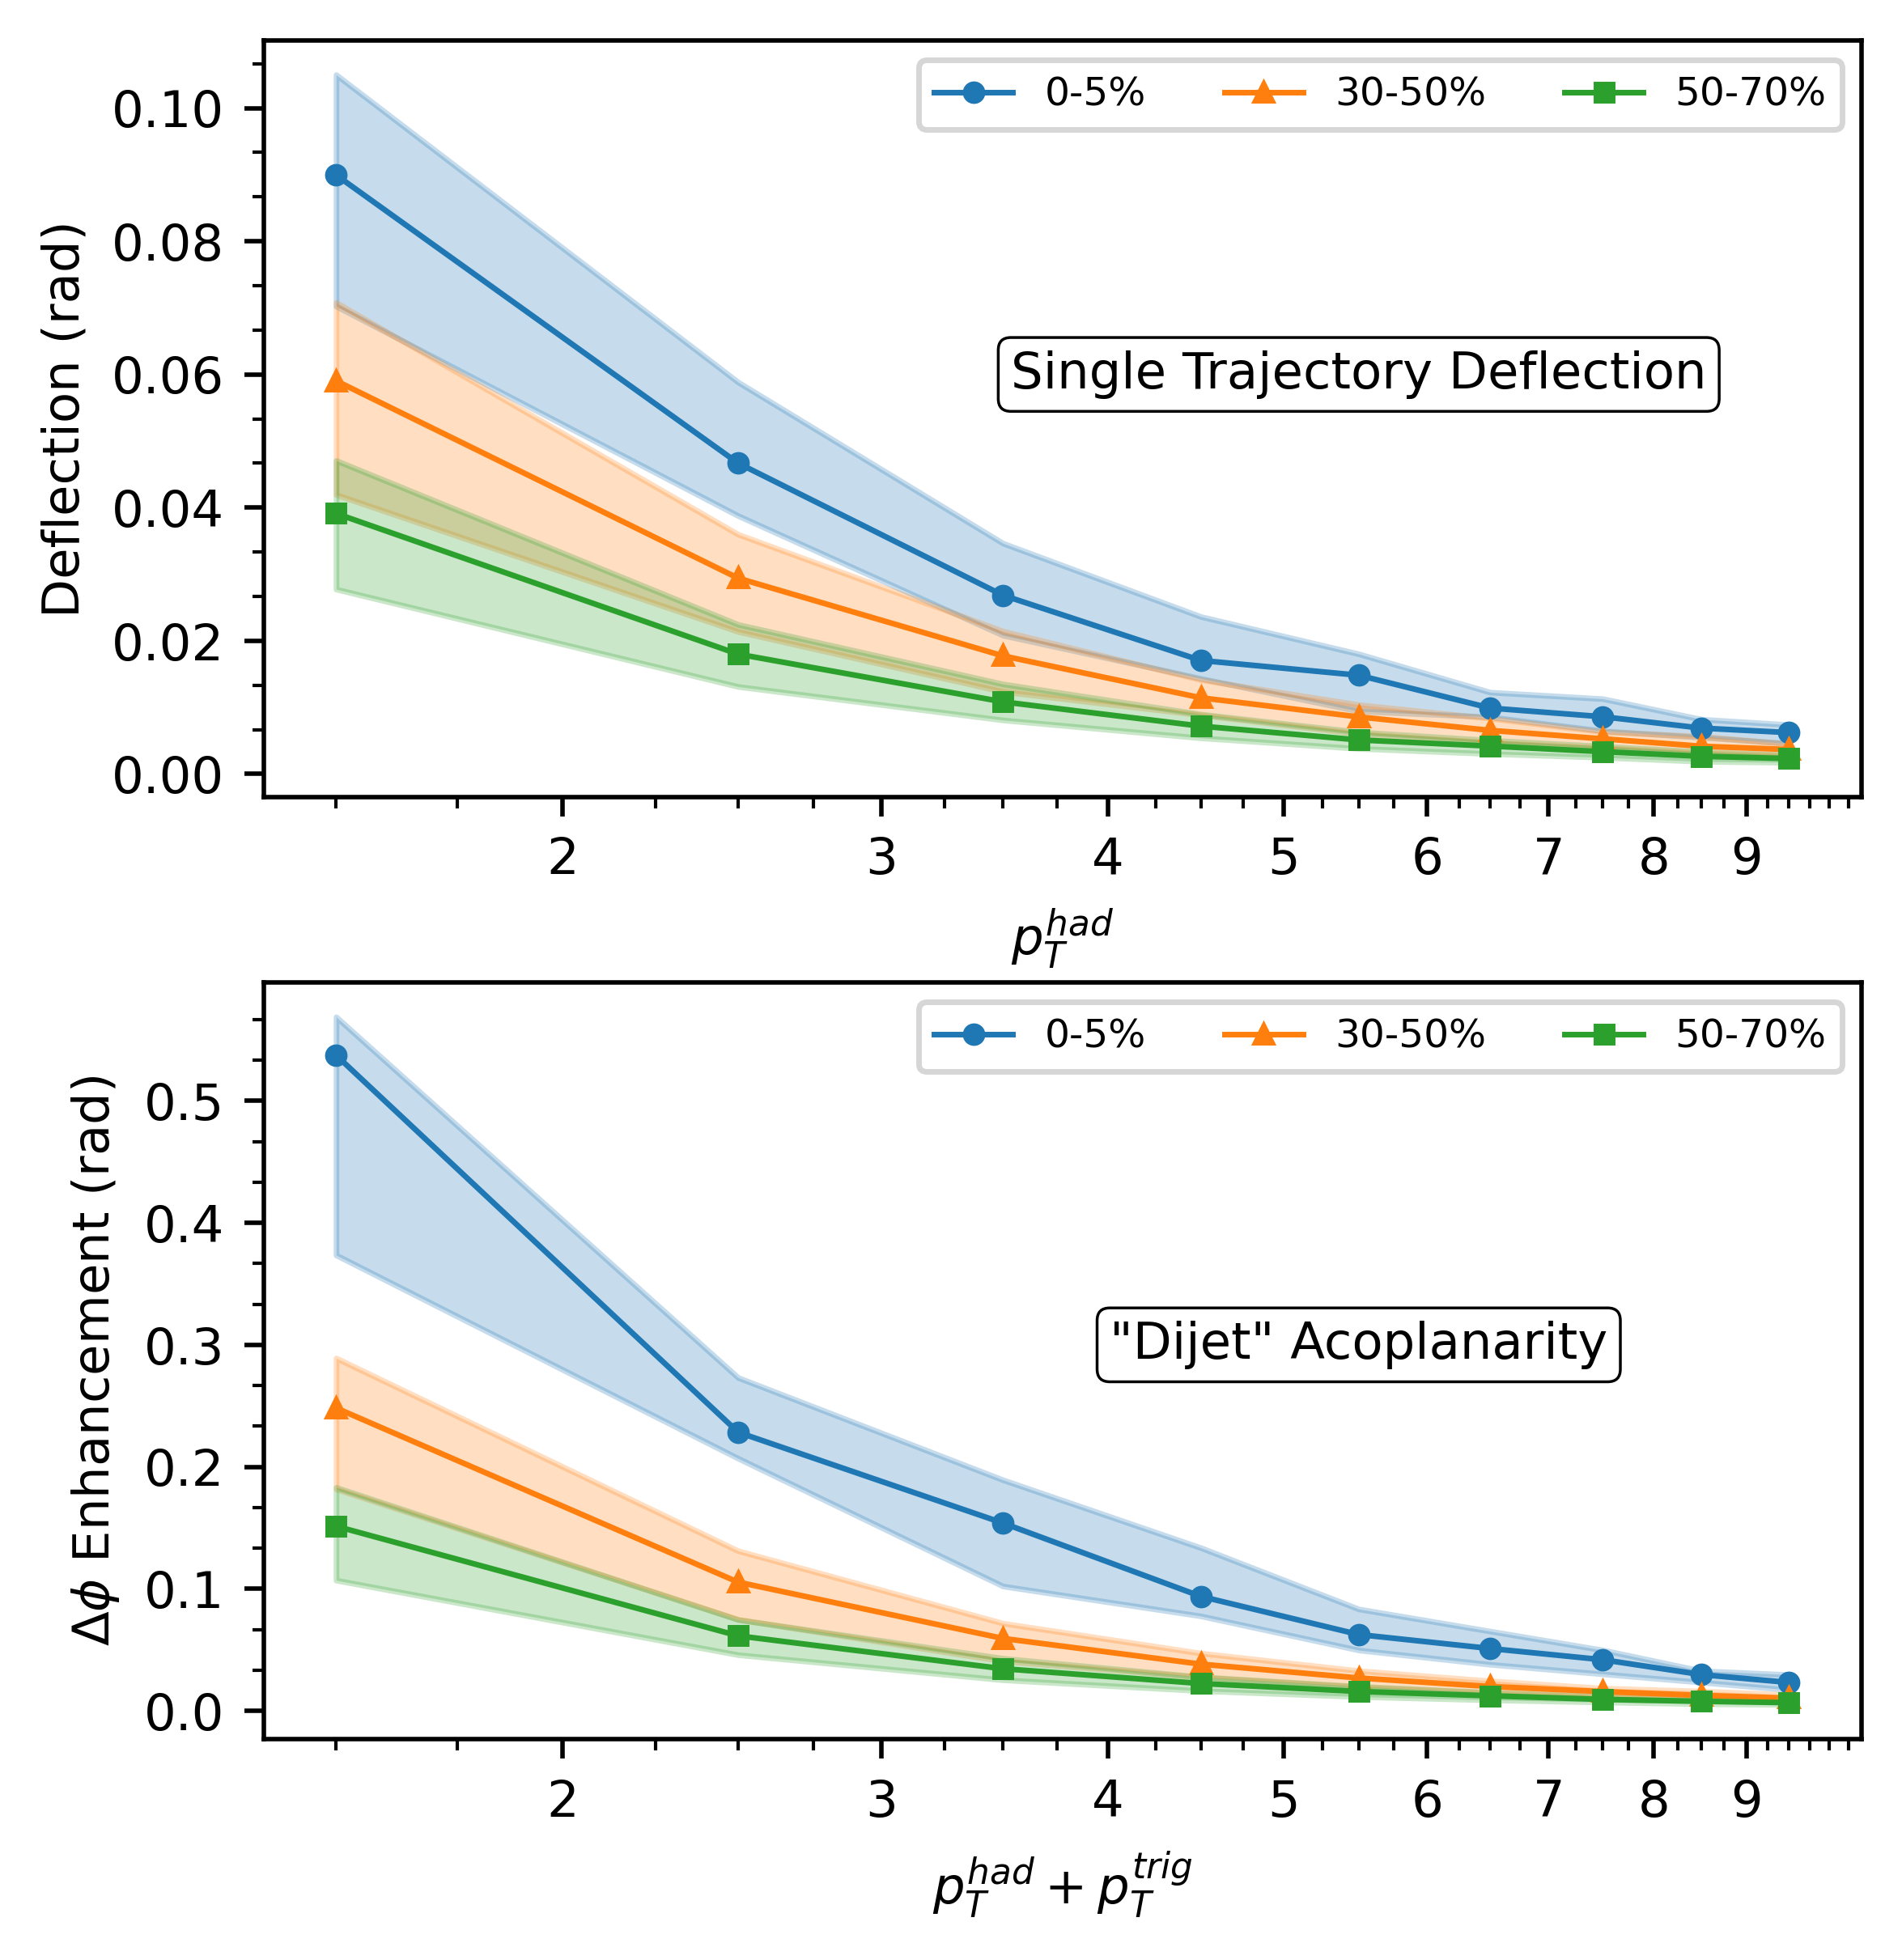

In [4]:
from matplotlib.gridspec import GridSpec

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Styles
fontsize = 9
legend_fontsize = 7
width_inches = 4.8
aspect = (5/3)*(1/1.618)
lines='solid'
dpi = 500
axes_padding=0.2
line_width = 1
marker_size = 3
mark = ['o', '^', 's', 'p']
x_ticks = np.arange(1, 10)#[1, 2, 3, 4, 10]
x_tick_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
error_alpha = 0.25
        
fig = plt.figure(layout="tight", dpi=dpi, figsize=(width_inches, aspect*width_inches))

gs = GridSpec(2, 1, figure=fig, height_ratios=[1,1])

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
#fig.supylabel(r"$\langle\Delta \phi\rangle$", x=0.02, y=0.5)

# Plot axes
defl['plot_pt'] = defl['hadron_pt_f']
defl_125['plot_pt'] = defl_125['hadron_pt_f']
defl_075['plot_pt'] = defl_075['hadron_pt_f']

aco['plot_pt'] = aco['pt_1'] + aco['pt_2']
aco_125['plot_pt'] = aco_125['pt_1'] + aco_125['pt_2']
aco_075['plot_pt'] = aco_075['pt_1'] + aco_075['pt_2']



ax1.tick_params(labelbottom=True, labelleft=True, labelsize=fontsize)
ax1.text(5.5, 0.06, "Single Trajectory Deflection", va="center", ha="center", fontsize=fontsize, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.25', linewidth=0.5))
ax1.set_xlabel(r"$p_T^{had}$", fontsize=fontsize)
ax1.set_ylabel(r"Deflection (rad)", fontsize=fontsize)
ax1.set_xscale('log')
ax1.set_xticks(x_ticks, x_tick_labels, minor=False)
#ax1.set_xticks([], minor=False)

ax2.tick_params(labelbottom=True, labelleft=True, labelsize=fontsize)
ax2.text(5.5, 0.3, "\"Dijet\" Acoplanarity", va="center", ha="center", fontsize=fontsize, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.25', linewidth=0.5))
ax2.set_xlabel(r"$p_T^{had} + p_T^{trig}$", fontsize=fontsize)
ax2.set_ylabel(r"$\Delta \phi$ Enhancement (rad)", fontsize=fontsize)
ax2.set_xscale('log')
ax2.set_xticks(x_ticks, x_tick_labels, minor=False)
#ax2.set_xticks([], minor=False)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

pt_bins = np.arange(1, 11)
pt_bin_centers = (pt_bins[0:-1] + pt_bins[1:])/2

cent_list = ['0-5', '30-50', '50-70']
for j in np.arange(0, len(cent_list)):
    cent = cent_list[j]
    if cent == '30-50':
        defl_cent_mask = (defl['cent'] == '30-40') | (defl['cent'] == '40-50')
        defl_cent_mask_125 = (defl_125['cent'] == '30-40') | (defl_125['cent'] == '40-50')
        defl_cent_mask_075 = (defl_075['cent'] == '30-40') | (defl_075['cent'] == '40-50')
        
        cent_mask = (aco['cent'] == '30-40') | (aco['cent'] == '40-50')
        cent_mask_125 = (aco_125['cent'] == '30-40') | (aco_125['cent'] == '40-50')
        cent_mask_075 = (aco_075['cent'] == '30-40') | (aco_075['cent'] == '40-50')
    elif cent == '50-70':
        defl_cent_mask = (defl['cent'] == '50-60') | (defl['cent'] == '60-70')
        defl_cent_mask_125 = (defl_125['cent'] == '50-60') | (defl_125['cent'] == '60-70')
        defl_cent_mask_075 = (defl_075['cent'] == '50-60') | (defl_075['cent'] == '60-70')
        
        cent_mask = (aco['cent'] == '50-60') | (aco['cent'] == '60-70')
        cent_mask_125 = (aco_125['cent'] == '50-60') | (aco_125['cent'] == '60-70')
        cent_mask_075 = (aco_075['cent'] == '50-60') | (aco_075['cent'] == '60-70')
    else:
        defl_cent_mask = (defl['cent'] == '0-5')
        defl_cent_mask_125 = (defl_125['cent'] == '0-5')
        defl_cent_mask_075 = (defl_075['cent'] == '0-5')
        
        cent_mask = (aco['cent'] == '0-5')
        cent_mask_125 = (aco_125['cent'] == '0-5')
        cent_mask_075 = (aco_075['cent'] == '0-5')

    # Create storage arrays
    defl_array = np.array([])
    defl_125_array = np.array([])
    defl_075_array = np.array([])
    
    aco_array = np.array([])
    aco_125_array = np.array([])
    aco_075_array = np.array([])
    
    for i in np.arange(0, len(pt_bin_centers)):
        pt_min = pt_bins[i]
        pt_max = pt_bins[i+1]

        # Get deflections and append
        defl_val = np.average(defl[defl_cent_mask & (defl['plot_pt'] > pt_min) 
                      & (defl['plot_pt'] < pt_max)]['defl'],
                              weights = defl[defl_cent_mask & (defl['plot_pt'] > pt_min) 
                      & (defl['plot_pt'] < pt_max)]['AA_weight'])
        defl_array = np.append(defl_array, defl_val)

        defl_125_val = np.average(defl_125[defl_cent_mask_125 & (defl_125['plot_pt'] > pt_min) 
                      & (defl_125['plot_pt'] < pt_max)]['defl'],
                              weights = defl_125[defl_cent_mask_125 & (defl_125['plot_pt'] > pt_min) 
                      & (defl_125['plot_pt'] < pt_max)]['AA_weight'])
        defl_125_array = np.append(defl_125_array, defl_125_val)

        defl_075_val = np.average(defl_075[defl_cent_mask_075 & (defl_075['plot_pt'] > pt_min) 
                      & (defl_075['plot_pt'] < pt_max)]['defl'],
                              weights = defl_075[defl_cent_mask_075 & (defl_075['plot_pt'] > pt_min) 
                      & (defl_075['plot_pt'] < pt_max)]['AA_weight'])
        defl_075_array = np.append(defl_075_array, defl_075_val)

        # Get acoplanarity and append
        aco_val = np.average(aco[cent_mask & (aco['plot_pt'] > pt_min) 
                      & (aco['plot_pt'] < pt_max)]['aco'], weights=aco[cent_mask & (aco['plot_pt'] > pt_min) 
                      & (aco['plot_pt'] < pt_max)]['weight'])
        aco_array = np.append(aco_array, aco_val)

        aco_125_val = np.average(aco_125[cent_mask_125 & (aco_125['plot_pt'] > pt_min) 
                      & (aco_125['plot_pt'] < pt_max)]['aco'], weights=aco_125[cent_mask_125 & (aco_125['plot_pt'] > pt_min) 
                      & (aco_125['plot_pt'] < pt_max)]['weight'])
        aco_125_array = np.append(aco_125_array, aco_125_val)

        aco_075_val = np.average(aco_075[cent_mask_075 & (aco_075['plot_pt'] > pt_min) 
                      & (aco_075['plot_pt'] < pt_max)]['aco'], weights=aco_075[cent_mask_075 & (aco_075['plot_pt'] > pt_min) 
                      & (aco_075['plot_pt'] < pt_max)]['weight'])
        aco_075_array = np.append(aco_075_array, aco_075_val)
        
    ax1.plot(pt_bin_centers, defl_array, label='{}%'.format(cent), ls=lines, marker=mark[j], linewidth=line_width, markersize=marker_size, color=colors[j])
    ax1.fill_between(pt_bin_centers, defl_075_array, defl_125_array, color=colors[j], alpha=error_alpha)
    
    ax2.plot(pt_bin_centers, aco_array, label='{}%'.format(cent), ls=lines, marker=mark[j], linewidth=line_width, markersize=marker_size, color=colors[j])
    ax2.fill_between(pt_bin_centers, aco_075_array, aco_125_array, color=colors[j], alpha=error_alpha)

ax1.xaxis.set_major_formatter('{x:.0f}')
ax1.xaxis.set_minor_locator(MultipleLocator(0.25))
ax1.xaxis.set_minor_formatter('')
ax1.yaxis.set_major_formatter('{x:.2f}')
ax1.yaxis.set_minor_locator(AutoMinorLocator(3))
ax1.yaxis.set_minor_formatter('')

ax2.xaxis.set_major_formatter('{x:.0f}')
ax2.xaxis.set_minor_locator(MultipleLocator(0.25))
ax2.xaxis.set_minor_formatter('')
ax2.yaxis.set_major_formatter('{x:.1f}')
ax2.yaxis.set_minor_locator(AutoMinorLocator(3))
ax2.yaxis.set_minor_formatter('')



ax1.legend(prop={'size': legend_fontsize}, ncol=3)
ax2.legend(prop={'size': legend_fontsize}, ncol=3)
gs.tight_layout(figure=fig, h_pad=axes_padding, w_pad=0)
fig.savefig('aco_plot.png', bbox_inches='tight')

In [5]:
np.amax(aco['aco'])

2.591053003264413

array([18.5259394 , 11.54383009,  4.40768579, ...,  0.94619614,
        0.63510006,  0.51402078])

(1.5, 3.141592653589793)

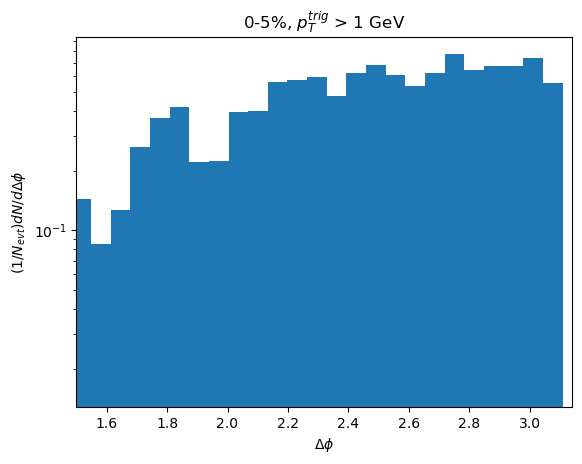

In [3]:
pt_min = 1
cent_choice = '0-5'
mask = ((aco['cent'] == cent_choice) 
        & (np.amax(np.stack((aco['pt_1'].to_numpy(), aco['pt_2'].to_numpy()), axis=1), axis=1) > pt_min)) #& (aco['pt_2'] > pt_min)
num_dijets = len(aco[mask]['aco'])
counts, bins = np.histogram((np.pi - aco[mask]['aco']), weights=aco[mask]['weight'], bins=30)
bin_widths = bins[1:] - bins[0:-1]

fig, axis = plt.subplots()

axis.set_title(r'{}%, '.format(cent_choice) + r'$p_T^{trig}$' + ' > {} GeV'.format(pt_min))
axis.set_xlabel(r'$\Delta\phi$')
axis.set_ylabel(r'$(1/N_{evt}) dN/d\Delta\phi$')
axis.bar(bins[:-1], counts/(bin_widths*num_dijets), width=bin_widths)
axis.set_yscale('log')
axis.set_xlim(1.5, np.pi)

In [7]:
ax1.legend(prop={'size': legend_fontsize}, ncol=3)
ax2.legend(prop={'size': legend_fontsize}, ncol=3)
gs.tight_layout(figure=fig, h_pad=axes_padding, w_pad=0)
fig.savefig('aco_plot.png', bbox_inches='tight')

/tmp/jbahder-tmpdir-OpfEgQ/ipykernel_756280/3574582407.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('aco_plot.png', bbox_inches='tight')


In [3]:
acoplan_0_5 = np.load('aco_def_data/aco_small_ish_noCNM_0-5.npz')
acoplan_20_30 = np.load('aco_def_data/aco_small_ish_noCNM_20-30.npz')
acoplan_40_50 = np.load('aco_def_data/aco_small_ish_noCNM_40-50.npz')
acoplan_60_70 = np.load('aco_def_data/aco_small_ish_noCNM_60-70.npz')

deflect_0_5 = np.load('aco_def_data/def_10k_noCNM_0-5.npz')
deflect_20_30 = np.load('aco_def_data/def_10k_noCNM_20-30.npz')
deflect_40_50 = np.load('aco_def_data/def_10k_noCNM_40-50.npz')
deflect_60_70 = np.load('aco_def_data/def_10k_noCNM_60-70.npz')


In [4]:
deflect_0_5['pt']

array([ 1.04927057,  1.15266689,  1.266252  ,  1.39102992,  1.5281036 ,
        1.67868467,  1.84410418,  2.02582431,  2.22545135,  2.44474987,
        2.68565831,  2.95030615,  3.24103268,  3.56040775,  3.91125439,
        4.29667387,  4.72007302,  5.1851944 ,  5.69614938,  6.25745444,
        6.87407115,  7.55144997,  8.29557847,  9.11303425, 10.01104305,
       10.99754267, 12.08125308, 13.27175356, 14.57956731, 16.01625452,
       17.59451453, 19.32829809, 21.23293065, 23.32524789, 25.62374445,
       28.14873749, 30.92254623, 33.96968925, 37.31710122, 40.99437099,
       45.03400312, 49.47170521, 54.34670354, 59.70208977, 65.58520188,
       72.04804257, 79.14773896, 86.94704754, 95.5149089 ])

/tmp/jbahder-tmpdir-uqF1y6/ipykernel_4060648/1165590221.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('aco_plot.png', bbox_inches='tight')


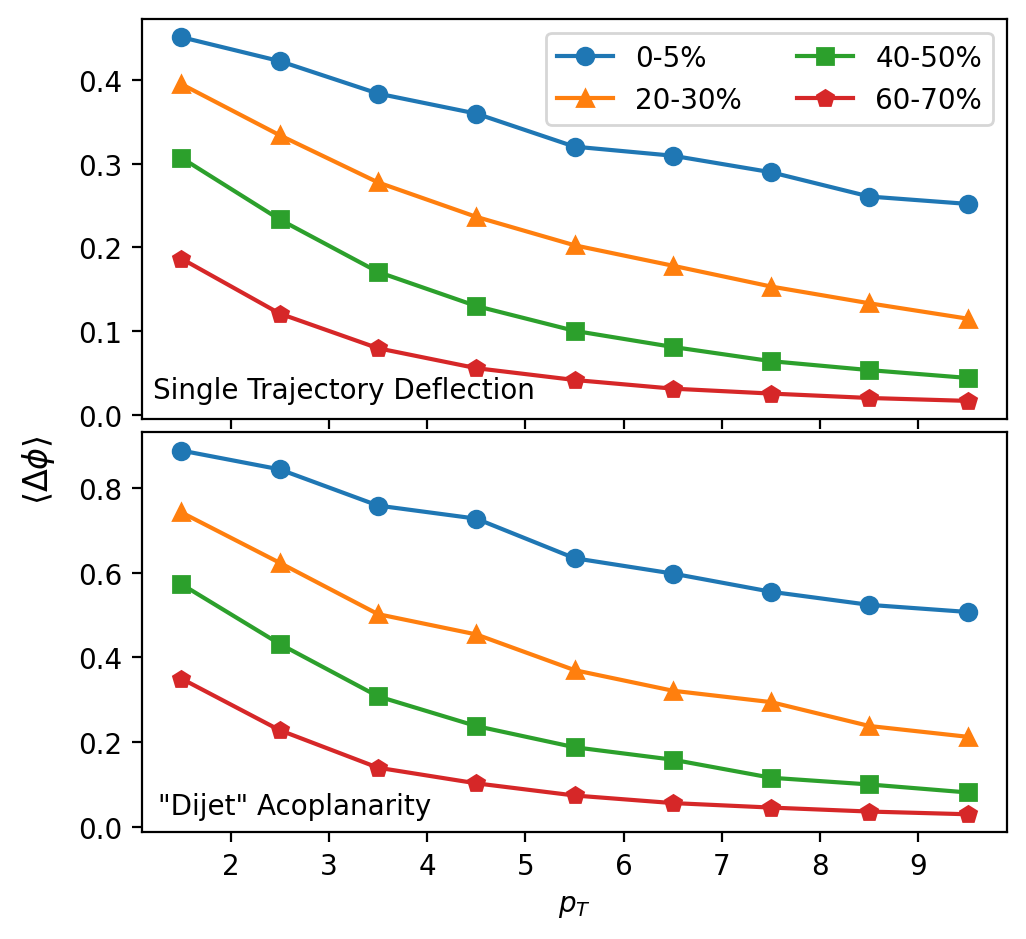

In [5]:
from matplotlib.gridspec import GridSpec

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
        
w, h = plt.figaspect(0.5)
fig = plt.figure(layout="tight", dpi=200, figsize=(w, h))

gs = GridSpec(2, 2, figure=fig, height_ratios=[1,1])


#ax1 = fig.add_subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
# aspect=0.75
ax1 = fig.add_subplot(gs[0, :-1])
# ax3 = fig.add_subplot(gs[1, :-1], sharex=ax1)
ax2 = fig.add_subplot(gs[1, :-1], sharex=ax1)
# ax1.set_aspect(aspect, adjustable='box')
# ax2.set_aspect(aspect, adjustable='box')
#ax3 = fig.add_subplot(gs[0:, -1], sharex=ax1)
# ax4 = fig.add_subplot(gs[-1, 0])
# ax5 = fig.add_subplot(gs[-1, -2])

# Create inset
# axins = inset_axes(ax2, width=1.3, height=0.9)
# axins.tick_params(labelleft=False, labelbottom=False)

#fig.suptitle("GridSpec")
#fig.supxlabel(r"$p_T$")
fig.supylabel(r"$\langle\Delta \phi\rangle$", x=0.02, y=0.5)

# Styles
fontsize = 12
lines = 'solid'
mark = 'o'
mark1 = mark
mark2 = '^'
mark3 = 's'
mark4 = 'p'

# Plot hadronic delta v2
ax1.tick_params(labelbottom=False, labelleft=True)
ax1.text(3.15, 0.03, "Single Trajectory Deflection", va="center", ha="center")
ax1.plot(deflect_0_5['pt'], deflect_0_5['deflect'], label='0-5%', ls=lines, marker=mark1)
ax1.plot(deflect_20_30['pt'], deflect_20_30['deflect'], label='20-30%', ls=lines, marker=mark2)
ax1.plot(deflect_40_50['pt'], deflect_40_50['deflect'], label='40-50%', ls=lines, marker=mark3)
ax1.plot(deflect_60_70['pt'], deflect_60_70['deflect'], label='60-70%', ls=lines, marker=mark4)
# ax1.plot(v2_hard_20_30['pt'], v2_hard_20_30['drift_v2'] - v2_hard_20_30['el_v2'], label='20-30%', ls=lines, marker=mark)
# ax1.plot(v2_hard_40_50['pt'], v2_hard_40_50['drift_v2'] - v2_hard_40_50['el_v2'], label='40-50%', ls=lines, marker=mark)
# ax1.plot(v2_hard_60_70['pt'], v2_hard_60_70['drift_v2'] - v2_hard_60_70['el_v2'], label='60-70%', ls=lines, marker=mark)
#ax1.set_xlim(0, 10)
ax1.legend(ncol=2)

# Plot hadronic delta v2 ratio with cel
# shift = np.random.default_rng().uniform(-0.001, 0.001, len(v2_hard_0_5['pt']))
# ax3.tick_params(labelbottom=False, labelleft=True)
# ax3.text(3, 1.75, 'ratio (rad+cel)/(rad)', va="center", ha="center")
# ax3.plot(v2_hard_0_5['pt'], (v2_hard_0_5['drift_v2'] - v2_hard_0_5['el_v2'] + shift)/(v2_hard_0_5['drift_v2'] - v2_hard_0_5['el_v2']), label='0-5%', ls=lines, marker=mark)
# # ax3.plot(v2_hard_20_30['pt'], (v2_hard_20_30['drift_v2'] - v2_hard_20_30['el_v2'] + shift)/(v2_hard_20_30['drift_v2'] - v2_hard_20_30['el_v2']), label='20-30%', ls=lines, marker=mark)
# # ax3.plot(v2_hard_40_50['pt'], (v2_hard_40_50['drift_v2'] - v2_hard_40_50['el_v2'] + shift)/(v2_hard_40_50['drift_v2'] - v2_hard_40_50['el_v2']), label='40-50%', ls=lines, marker=mark)
# # ax3.plot(v2_hard_60_70['pt'], (v2_hard_60_70['drift_v2'] - v2_hard_60_70['el_v2'] + shift)/(v2_hard_60_70['drift_v2'] - v2_hard_60_70['el_v2']), label='60-70%', ls=lines, marker=mark)
# ax3.set_xlim(0, 10)
# ax3.set_ylim(0.25, 2)

# Plot partonic delta v2
ax2.tick_params(labelbottom=True, labelleft=True)
ax2.text(2.65, 0.05, "\"Dijet\" Acoplanarity", va="center", ha="center")
ax2.plot(acoplan_0_5['pt'], acoplan_0_5['aco'], label='0-5%', ls=lines, marker=mark1)
ax2.plot(acoplan_20_30['pt'], acoplan_20_30['aco'], label='20-30%', ls=lines, marker=mark2)
ax2.plot(acoplan_40_50['pt'], acoplan_40_50['aco'], label='40-50%', ls=lines, marker=mark3)
ax2.plot(acoplan_60_70['pt'], acoplan_60_70['aco'], label='60-70%', ls=lines, marker=mark4)
# ax2.plot(v2_part_20_30['pt'], v2_part_20_30['drift_v2'] - v2_part_20_30['el_v2'], label='20-30%', ls=lines, marker=mark)
# ax2.plot(v2_part_40_50['pt'], v2_part_40_50['drift_v2'] - v2_part_40_50['el_v2'], label='40-50%', ls=lines, marker=mark)
# ax2.plot(v2_part_60_70['pt'], v2_part_60_70['drift_v2'] - v2_part_60_70['el_v2'], label='60-70%', ls=lines, marker=mark)
ax2.set_xlabel(r"$p_T$")
#ax2.legend(ncol=2)
#ax2.set_yscale('log')

gs.tight_layout(figure=fig, h_pad=0, w_pad=0)
fig.savefig('aco_plot.png', bbox_inches='tight')

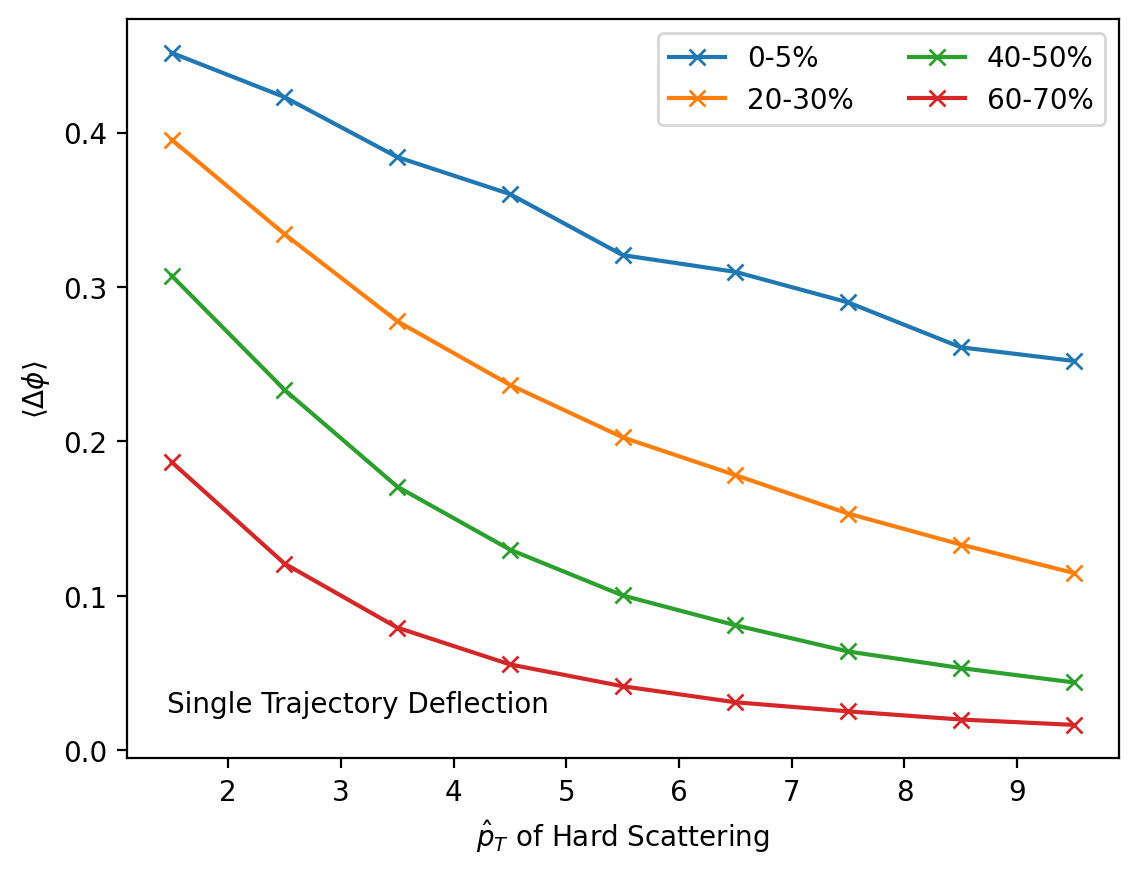

In [30]:
# Make the figure
fig, ax1 = plt.subplots(dpi=200)

ax1.text(3.15, 0.03, "Single Trajectory Deflection", va="center", ha="center")
ax1.plot(deflect_0_5['pt'], deflect_0_5['deflect'], label='0-5%', ls=lines, marker=mark)
ax1.plot(deflect_20_30['pt'], deflect_20_30['deflect'], label='20-30%', ls=lines, marker=mark)
ax1.plot(deflect_40_50['pt'], deflect_40_50['deflect'], label='40-50%', ls=lines, marker=mark)
ax1.plot(deflect_60_70['pt'], deflect_60_70['deflect'], label='60-70%', ls=lines, marker=mark)
ax1.set_xlabel(r"$\hat{p}_T$ of Hard Scattering")
ax1.set_ylabel(r"$\langle\Delta \phi\rangle$")
# ax1.plot(v2_hard_20_30['pt'], v2_hard_20_30['drift_v2'] - v2_hard_20_30['el_v2'], label='20-30%', ls=lines, marker=mark)
# ax1.plot(v2_hard_40_50['pt'], v2_hard_40_50['drift_v2'] - v2_hard_40_50['el_v2'], label='40-50%', ls=lines, marker=mark)
# ax1.plot(v2_hard_60_70['pt'], v2_hard_60_70['drift_v2'] - v2_hard_60_70['el_v2'], label='60-70%', ls=lines, marker=mark)
#ax1.set_xlim(0, 10)
ax1.legend(ncol=2)
fig.savefig('def_only.png')

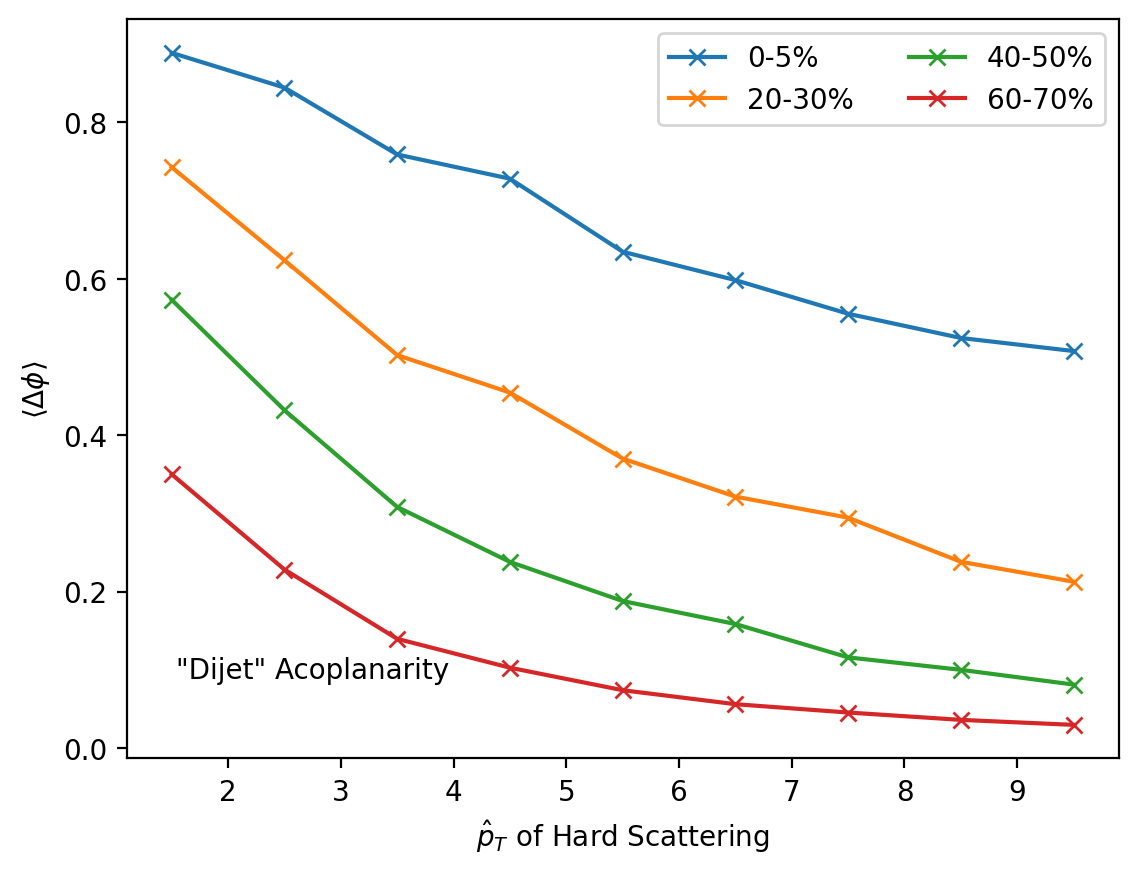

In [29]:
# Make the figure
fig, ax2 = plt.subplots(dpi=200)

ax2.tick_params(labelbottom=True, labelleft=True)
ax2.text(2.75, 0.1, "\"Dijet\" Acoplanarity", va="center", ha="center")
ax2.plot(acoplan_0_5['pt'], acoplan_0_5['aco'], label='0-5%', ls=lines, marker=mark)
ax2.plot(acoplan_20_30['pt'], acoplan_20_30['aco'], label='20-30%', ls=lines, marker=mark)
ax2.plot(acoplan_40_50['pt'], acoplan_40_50['aco'], label='40-50%', ls=lines, marker=mark)
ax2.plot(acoplan_60_70['pt'], acoplan_60_70['aco'], label='60-70%', ls=lines, marker=mark)
ax2.set_xlabel(r"$\hat{p}_T$ of Hard Scattering")
ax2.set_ylabel(r"$\langle\Delta \phi\rangle$")
ax2.legend(ncol=2)
fig.savefig('aco_only.png')

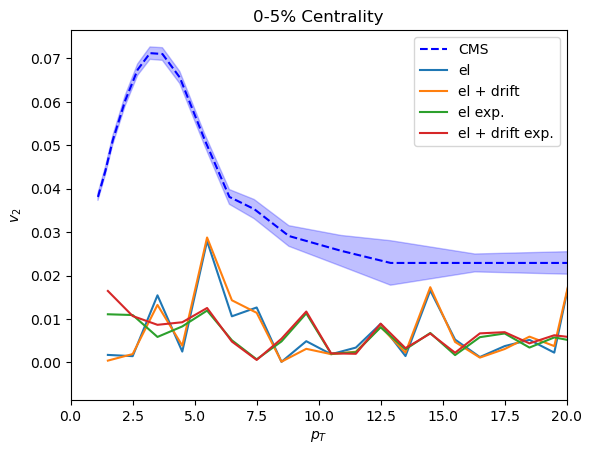

In [6]:
fig, axis = plt.subplots()
axis.set_xlabel(r'$p_T$')
axis.set_ylabel(r'$v_2$')
axis.set_title('0-5% Centrality')

CMS_df = CMS_0_5_v2
alice_v2_pt_array = CMS_df['pt'].to_numpy()
alice_v2_val_array = CMS_df['v2'].to_numpy()
alice_v2_nerr_array = -np.sqrt(CMS_df['stat+'].to_numpy()**2 + CMS_df['syst+'].to_numpy()**2)
alice_v2_perr_array = np.sqrt(CMS_df['stat-'].to_numpy()**2 + CMS_df['syst-'].to_numpy()**2)

axis.plot(alice_v2_pt_array, alice_v2_val_array, label='CMS', linestyle='--', color='blue')
axis.fill_between(alice_v2_pt_array, alice_v2_val_array+alice_v2_nerr_array, alice_v2_val_array+alice_v2_perr_array, alpha=0.25, color='blue')

axis.plot(v2_hard_0_5['pt'], v2_hard_0_5['el_v2'], label='el')
axis.plot(v2_hard_0_5['pt'], v2_hard_0_5['drift_v2'], label='el + drift')
axis.plot(v2_exp_0_5['pt'], v2_exp_0_5['el_v2'], label='el exp.')
axis.plot(v2_exp_0_5['pt'], v2_exp_0_5['drift_v2'], label='el + drift exp.')
axis.set_xlim(0, 20)
axis.legend()

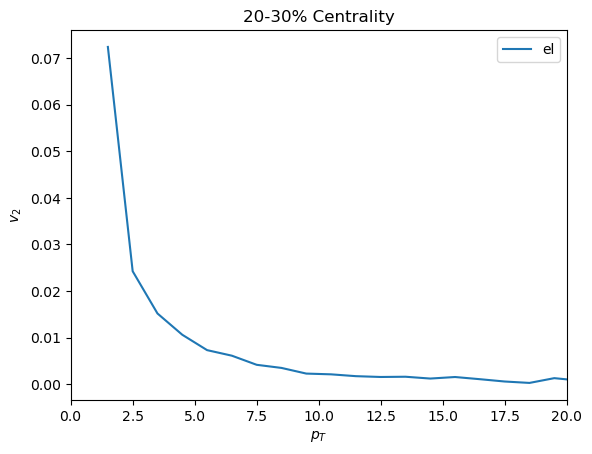

In [13]:
fig, axis = plt.subplots()
axis.set_xlabel(r'$p_T$')
axis.set_ylabel(r'$v_2$')
axis.set_title('20-30% Centrality')

# CMS_df = CMS_20_30_v2
# alice_v2_pt_array = CMS_df['pt'].to_numpy()
# alice_v2_val_array = CMS_df['v2'].to_numpy()
# alice_v2_nerr_array = -np.sqrt(CMS_df['stat+'].to_numpy()**2 + CMS_df['syst+'].to_numpy()**2)
# alice_v2_perr_array = np.sqrt(CMS_df['stat-'].to_numpy()**2 + CMS_df['syst-'].to_numpy()**2)

# axis.plot(alice_v2_pt_array, alice_v2_val_array, label='CMS', linestyle='--', color='blue')
# axis.fill_between(alice_v2_pt_array, alice_v2_val_array+alice_v2_nerr_array, alice_v2_val_array+alice_v2_perr_array, alpha=0.25, color='blue')

axis.plot(v2_hard_20_30['pt'], v2_hard_20_30['drift_v2']-v2_hard_20_30['el_v2'], label='el')
# axis.plot(v2_20_30['pt'], , label='el + drift')
axis.set_xlim(0, 20)
axis.legend()

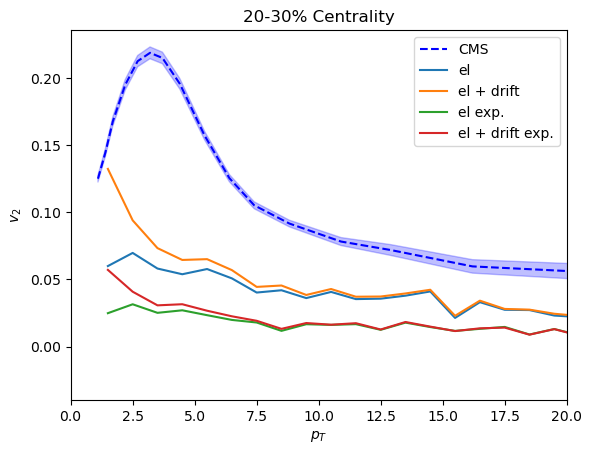

In [11]:
fig, axis = plt.subplots()
axis.set_xlabel(r'$p_T$')
axis.set_ylabel(r'$v_2$')
axis.set_title('20-30% Centrality')

CMS_df = CMS_20_30_v2
alice_v2_pt_array = CMS_df['pt'].to_numpy()
alice_v2_val_array = CMS_df['v2'].to_numpy()
alice_v2_nerr_array = -np.sqrt(CMS_df['stat+'].to_numpy()**2 + CMS_df['syst+'].to_numpy()**2)
alice_v2_perr_array = np.sqrt(CMS_df['stat-'].to_numpy()**2 + CMS_df['syst-'].to_numpy()**2)

axis.plot(alice_v2_pt_array, alice_v2_val_array, label='CMS', linestyle='--', color='blue')
axis.fill_between(alice_v2_pt_array, alice_v2_val_array+alice_v2_nerr_array, alice_v2_val_array+alice_v2_perr_array, alpha=0.25, color='blue')

axis.plot(v2_hard_20_30['pt'], v2_hard_20_30['el_v2'], label='el')
axis.plot(v2_hard_20_30['pt'], v2_hard_20_30['drift_v2'], label='el + drift')
axis.plot(v2_exp_20_30['pt'], v2_exp_20_30['el_v2'], label='el exp.')
axis.plot(v2_exp_20_30['pt'], v2_exp_20_30['drift_v2'], label='el + drift exp.')
axis.set_xlim(0, 20)
axis.legend()

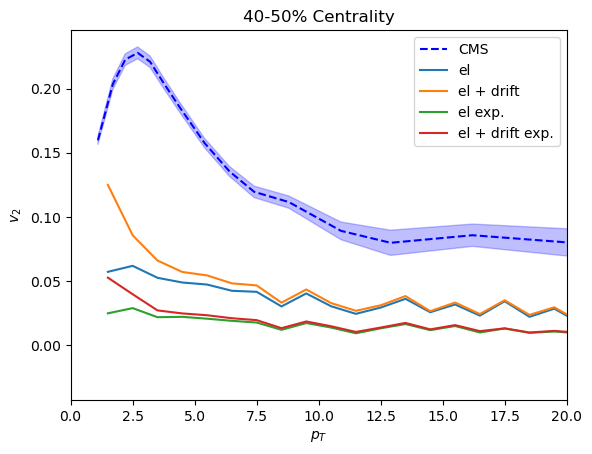

In [12]:
fig, axis = plt.subplots()
axis.set_xlabel(r'$p_T$')
axis.set_ylabel(r'$v_2$')
axis.set_title('40-50% Centrality')

CMS_df = CMS_40_50_v2
alice_v2_pt_array = CMS_df['pt'].to_numpy()
alice_v2_val_array = CMS_df['v2'].to_numpy()
alice_v2_nerr_array = -np.sqrt(CMS_df['stat+'].to_numpy()**2 + CMS_df['syst+'].to_numpy()**2)
alice_v2_perr_array = np.sqrt(CMS_df['stat-'].to_numpy()**2 + CMS_df['syst-'].to_numpy()**2)

axis.plot(alice_v2_pt_array, alice_v2_val_array, label='CMS', linestyle='--', color='blue')
axis.fill_between(alice_v2_pt_array, alice_v2_val_array+alice_v2_nerr_array, alice_v2_val_array+alice_v2_perr_array, alpha=0.25, color='blue')

axis.plot(v2_hard_40_50['pt'], v2_hard_40_50['el_v2'], label='el')
axis.plot(v2_hard_40_50['pt'], v2_hard_40_50['drift_v2'], label='el + drift')
axis.plot(v2_exp_40_50['pt'], v2_exp_40_50['el_v2'], label='el exp.')
axis.plot(v2_exp_40_50['pt'], v2_exp_40_50['drift_v2'], label='el + drift exp.')
axis.set_xlim(0, 20)
axis.legend()

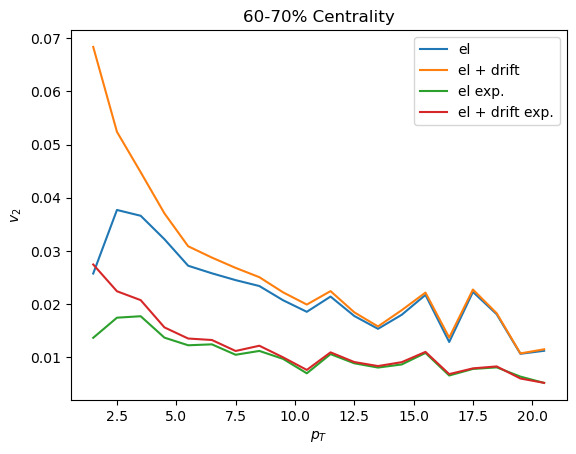

In [13]:
fig, axis = plt.subplots()
axis.set_xlabel(r'$p_T$')
axis.set_ylabel(r'$v_2$')
axis.set_title('60-70% Centrality')

axis.plot(v2_hard_60_70['pt'], v2_hard_60_70['el_v2'], label='el')
axis.plot(v2_hard_60_70['pt'], v2_hard_60_70['drift_v2'], label='el + drift')
axis.plot(v2_exp_60_70['pt'], v2_exp_60_70['el_v2'], label='el exp.')
axis.plot(v2_exp_60_70['pt'], v2_exp_60_70['drift_v2'], label='el + drift exp.')
axis.legend()